<a href="https://colab.research.google.com/github/peronvidal/tp-grupal-3-marias/blob/master/EDA_intervenciones_seguridad_vial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(15,5)})

In [2]:
!wget https://github.com/peronvidal/tp-grupal-3-marias/raw/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx

--2023-06-13 19:01:13--  https://github.com/peronvidal/tp-grupal-3-marias/raw/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx [following]
--2023-06-13 19:01:19--  https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP reques

In [3]:
df = pd.read_excel('intervenciones-de-seguridad-clean.xlsx')
orig_df= pd.read_excel('intervenciones-de-seguridad-clean.xlsx')

In [4]:

## Aca se agregan columnas con datos relacionados a fechas
df['fecha'] = pd.to_datetime(df['fecha']) # todas las fechas a datetime de pandas
df['year'] = pd.DatetimeIndex(df['fecha']).year
df['month'] = pd.DatetimeIndex(df['fecha']).month
df['day'] = pd.DatetimeIndex(df['fecha']).month
# Define a function to apply the condition
def condition(row):
    if row['lesionados'] > 0 or row['fallecidos']>0:
        return 'SI'
    else:
        return 'NO'

# Apply the function to create a new column
# df['NewColumn'] = df.apply(lambda row: condition(row), axis=1)

df['heridos_o_fallecidos'] = df.apply(lambda row: condition(row), axis=1)


df.head(10)

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,year,month,day,heridos_o_fallecidos
0,2014-01-01,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0,2014,1,1,SI
1,2014-01-01,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0,2014,1,1,NO
2,2014-01-01,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,2014,1,1,SI
3,2014-03-01,7,AU CAMPORA,DESCENDENTE,600,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,0,0,1,2014,3,3,NO
4,2014-03-01,21,AU PERTIO MORENO,DESCENDENTE,5400,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,2,0,0,2014,3,3,SI
5,2014-04-01,9,AU 25 DE MAYO,DESCENDENTE,4700,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,2014,4,4,NO
6,2014-04-01,19,AU DELLEPIANE,ASCENDENTE,3800,BUENO,SECA,1,0,OBSTACULO NO FIJO,0,1,0,0,2014,4,4,SI
7,2014-05-01,15,AU DELLEPIANE,ASCENDENTE,4000,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,1,0,0,1,2014,5,5,NO
8,2014-06-01,7,AV LUGONES,DESCENDENTE,7000,BUENO,SECA,3,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,2,2014,6,6,SI
9,2014-06-01,9,AU PERTIO MORENO,TRANSICION RAMAL 2,RAMAL ENLACE,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,2014,6,6,NO


In [5]:
df_month_superficie = df.groupby(['month','superficie_de_la_via'])['lesionados'].sum().reset_index()
df_month_superficie = df.groupby(['month','condiciones_meteorologicas'])['lesionados'].sum().reset_index()
df_year = df.groupby(['year'])['lesionados'].sum().reset_index()
df_month = df.groupby(['month'])['lesionados'].sum().reset_index()
# df_month_superficie.head
df_year.head()

,year,lesionados
0,2014,683
1,2015,715
2,2016,679
3,2017,740
4,2018,576


In [6]:
df.columns

Index(['fecha', 'hora', 'autopista', 'banda_y_o_ramal', 'pk',
       'condiciones_meteorologicas', 'superficie_de_la_via', 'lesionados',
       'fallecidos', 'tipo_de_siniestro', 'moto', 'liviano', 'bus', 'camion',
       'year', 'month', 'day', 'heridos_o_fallecidos'],
      dtype='object')

In [17]:
# sns.violinplot(y=df["heridos_o_fallecidos"],x=df["condiciones_meteorologicas"])

<AxesSubplot:xlabel='heridos_o_fallecidos'>

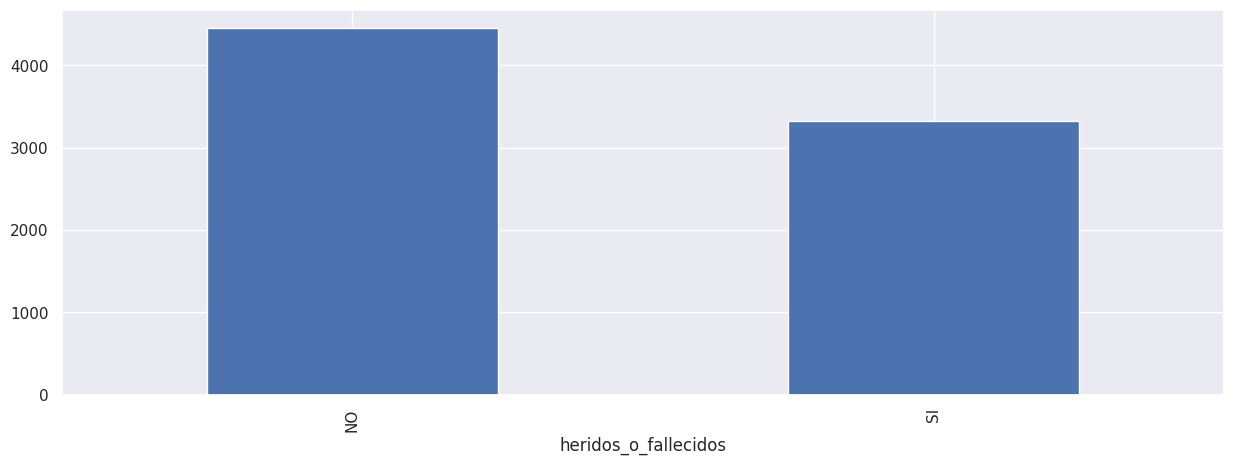

In [18]:
# porcentaje de intervenciones por estado de superficie
porcentajes_superficies = df['heridos_o_fallecidos'].value_counts()
porcentajes_superficies.plot(kind='bar')

In [19]:
# Creamos un objeto arbol

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Assuming 'AU CAMPORA' is a categorical variable in your dataset
label_encoder = LabelEncoder()
df['autopista'] = label_encoder.fit_transform(df['autopista']) 
df['condiciones_meteorologicas'] = label_encoder.fit_transform(df['condiciones_meteorologicas']) 
df['superficie_de_la_via'] = label_encoder.fit_transform(df['superficie_de_la_via']) 
df['tipo_de_siniestro'] = label_encoder.fit_transform(df['tipo_de_siniestro']) 
df['banda_y_o_ramal'] = label_encoder.fit_transform(df['banda_y_o_ramal']) 
df.head()

X = df.drop(["heridos_o_fallecidos","fecha","pk","banda_y_o_ramal","lesionados","fallecidos","year"], axis=1)
y = df['heridos_o_fallecidos']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
	# fecha	
  # hora
  # autopista
  # banda_y_o_ramal	
  # pk	
  # condiciones_meteorologicas
  # superficie_de_la_via	
  # lesionados
  # fallecidos	
  # tipo_de_siniestro	
  # moto	
  # liviano	
  # bus	camion	year	month	day	NewColumn	heridos_o_fallecidos

0.7609254498714653

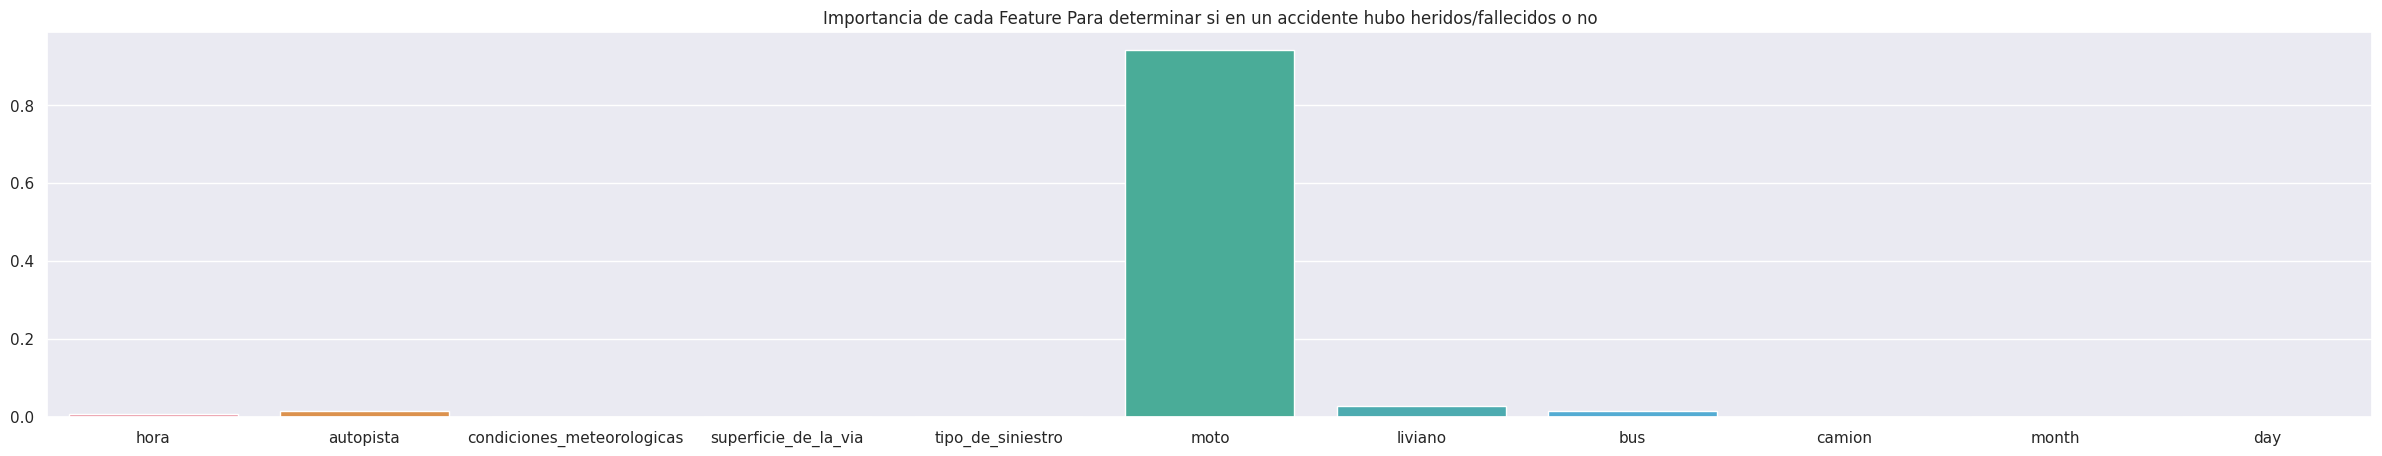

In [20]:
sns.set(rc={'figure.figsize':(30,5)})
importances = clf.feature_importances_
columns = X.columns
#print()
sns.barplot(x=columns, y=importances)
plt.title('Importancia de cada Feature Para determinar si en un accidente hubo heridos/fallecidos o no')
plt.show()


<AxesSubplot:>

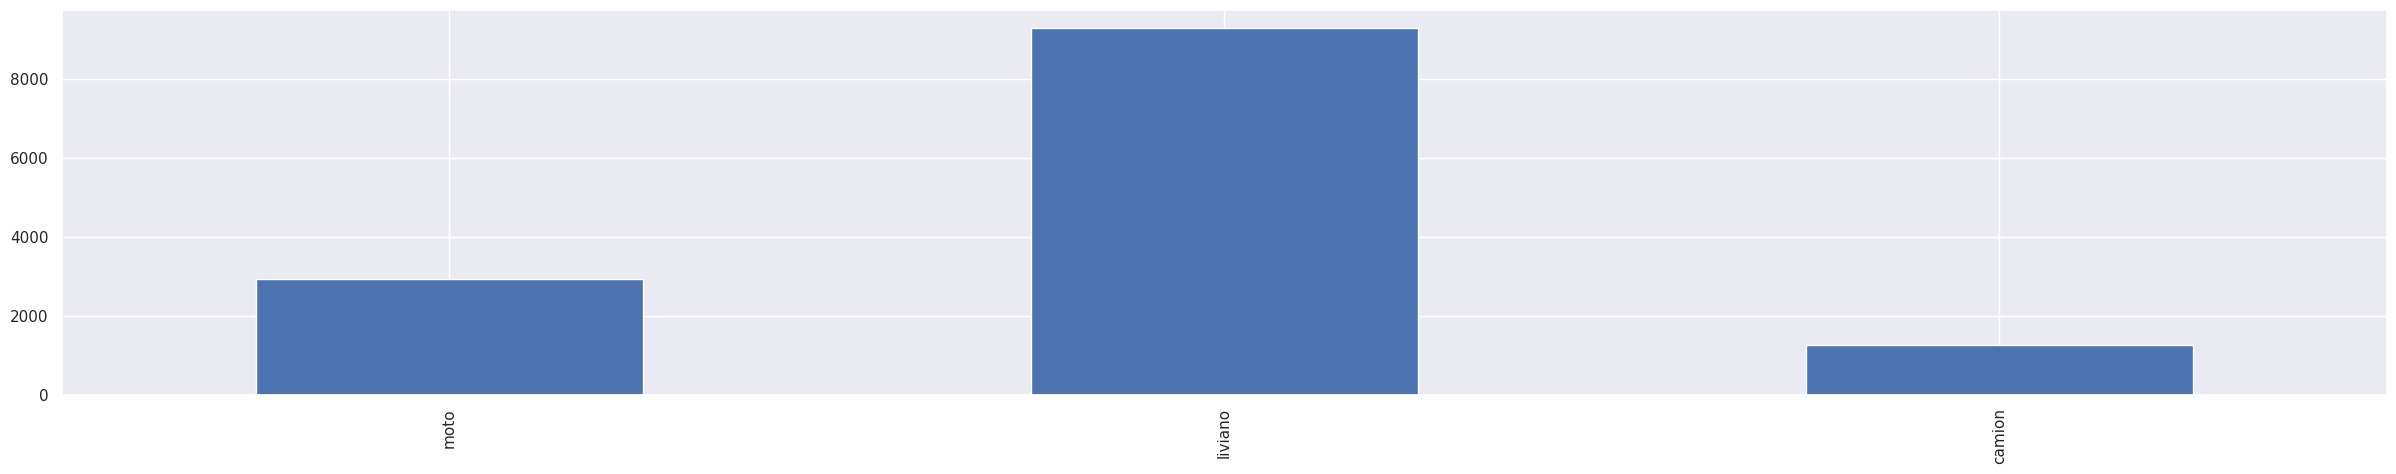

In [21]:
vehiculos = sums = df[['moto','liviano','camion']].sum()

vehiculos.plot(kind='bar')


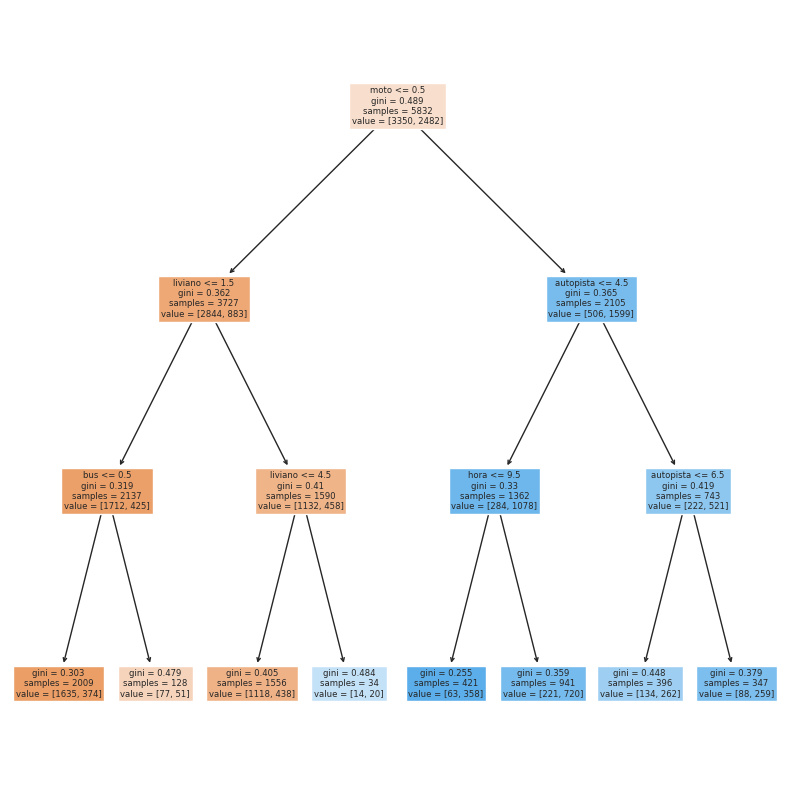

In [22]:
plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled = True,feature_names= X.columns)
plt.show()

<AxesSubplot:>

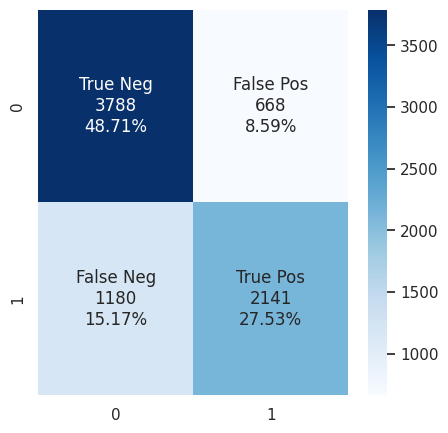

In [23]:
sns.set(rc={'figure.figsize':(5,5)})
y_pred_arbol = clf.predict(X)
cf_matrix = confusion_matrix(y, y_pred_arbol)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
